In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("../data/monthly_summary.csv")

df.head()

,month,revenue,profit,marketing_spend,quantity
0,2023-01,9.272117e+06,2.364405e+06,373425.270069,4371
1,2023-02,8.322178e+06,2.118916e+06,334019.149890,3870
2,2023-03,8.746114e+06,2.193157e+06,366080.349603,4137
3,2023-04,8.707523e+06,2.208815e+06,360454.593886,4101
4,2023-05,9.135034e+06,2.327897e+06,370499.225713,4273


In [5]:
df["month"] = pd.to_datetime(df["month"])#convert date into month
df = df.sort_values("month")

df.head()

,month,revenue,profit,marketing_spend,quantity
0,2023-01-01,9.272117e+06,2.364405e+06,373425.270069,4371
1,2023-02-01,8.322178e+06,2.118916e+06,334019.149890,3870
2,2023-03-01,8.746114e+06,2.193157e+06,366080.349603,4137
3,2023-04-01,8.707523e+06,2.208815e+06,360454.593886,4101
4,2023-05-01,9.135034e+06,2.327897e+06,370499.225713,4273


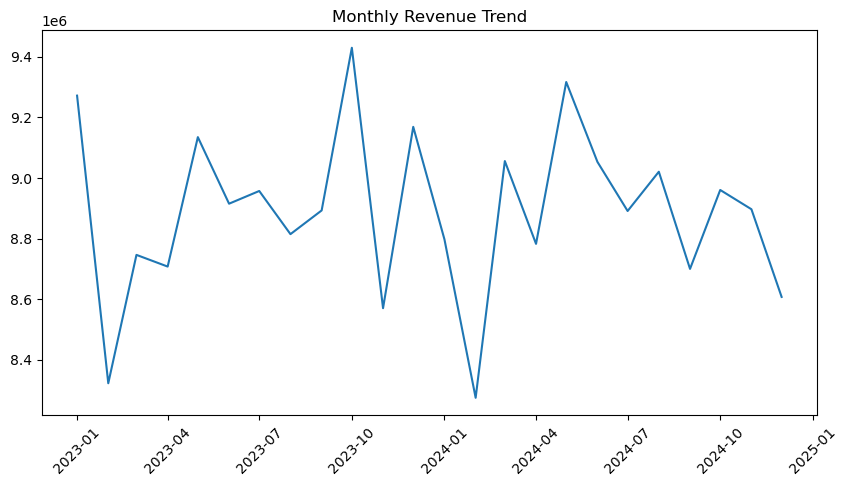

In [7]:
plt.figure(figsize=(10,5))#plot revenue 
plt.plot(df["month"], df["revenue"])
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()

In [8]:
df["lag_1"] = df["revenue"].shift(1)#This makes XGBoost understand time.
df["lag_2"] = df["revenue"].shift(2)
df["lag_3"] = df["revenue"].shift(3)

df = df.dropna()

df.head()

,month,revenue,profit,marketing_spend,quantity,lag_1,lag_2,lag_3
3,2023-04-01,8.707523e+06,2.208815e+06,360454.593886,4101,8.746114e+06,8.322178e+06,9.272117e+06
4,2023-05-01,9.135034e+06,2.327897e+06,370499.225713,4273,8.707523e+06,8.746114e+06,8.322178e+06
5,2023-06-01,8.915182e+06,2.244919e+06,367877.975868,4195,9.135034e+06,8.707523e+06,8.746114e+06
6,2023-07-01,8.957176e+06,2.253717e+06,372136.197605,4239,8.915182e+06,9.135034e+06,8.707523e+06
7,2023-08-01,8.814610e+06,2.212410e+06,367228.354649,4181,8.957176e+06,8.915182e+06,9.135034e+06


In [10]:
X = df[["lag_1", "lag_2", "lag_3"]]#prepare feature and target 
y = df["revenue"]

In [13]:
train_size = int(len(df) * 0.8)#train-test split

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [15]:
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [17]:
predictions = model.predict(X_test)#make predictions 

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)#eveluate model

RMSE: 245401.7162141887


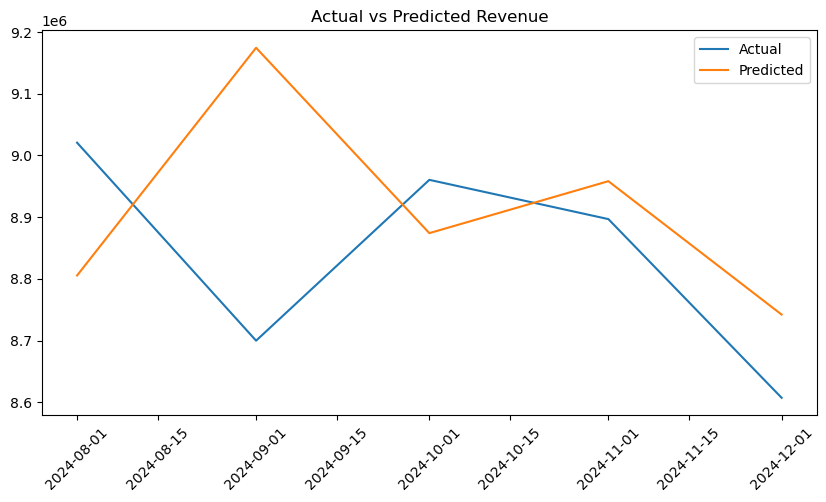

In [21]:
plt.figure(figsize=(10,5))#visual prediction vs actual
plt.plot(df["month"][train_size:], y_test.values, label="Actual")
plt.plot(df["month"][train_size:], predictions, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Revenue")
plt.xticks(rotation=45)
plt.show()

In [23]:
last_3 = df[["revenue"]].values[-3:].flatten()

future_forecast = []

for i in range(3):
    input_data = np.array(last_3[-3:]).reshape(1, -1)
    next_pred = model.predict(input_data)[0]
    future_forecast.append(next_pred)
    last_3 = np.append(last_3, next_pred)

print("Next 3 Months Forecast:")
print(future_forecast)

Next 3 Months Forecast:
[8586782.0, 8742474.0, 8832886.0]


In [25]:
# ============================================================
# DAY 2 - REVENUE FORECASTING USING XGBOOST
# PROJECT: E-Commerce Executive AI Decision Agent
# ============================================================

# ------------------------------------------------------------
# OBJECTIVE:
# Build a revenue forecasting model using XGBoost.
# We convert time-series data into supervised learning format
# using lag features and evaluate model performance using RMSE.
# ------------------------------------------------------------


# ============================================================
# IMPORTANT LIBRARIES
# ============================================================

# pandas (pd)
# - Used for reading CSV files
# - Data manipulation and transformation

# numpy (np)
# - Used for mathematical operations
# - Used for array manipulation

# matplotlib
# - Used for visualizing revenue trends
# - Helps understand patterns before modeling

# XGBRegressor (from xgboost)
# - Gradient Boosting model
# - Used for regression problems
# - Strong performance on structured/tabular data

# mean_squared_error (from sklearn.metrics)
# - Used to evaluate regression performance
# - Calculates average squared difference between actual & predicted


# ============================================================
# KEY CONCEPTS USED
# ============================================================

# 1. TIME SERIES DATA
#    Data indexed by time (monthly revenue in this case).

# 2. LAG FEATURES
#    Previous values of revenue used as predictors.
#    Example:
#        lag_1 = revenue from last month
#        lag_2 = revenue from 2 months ago
#        lag_3 = revenue from 3 months ago
#
#    Why needed?
#    XGBoost does NOT understand time automatically.
#    We convert time into supervised learning format.

# 3. SUPERVISED LEARNING
#    X (features) -> past revenue (lag values)
#    y (target)   -> current revenue

# 4. TRAIN-TEST SPLIT (TIME-BASED)
#    We DO NOT shuffle time series data.
#    First 80% -> Training
#    Last 20%  -> Testing

# 5. XGBOOST PARAMETERS
#    n_estimators:
#        Number of trees built sequentially.
#        More trees = more learning capacity.
#
#    learning_rate:
#        Controls how fast model learns.
#        Lower = slower but safer learning.
#
#    max_depth:
#        Controls complexity of each tree.
#        Higher = more complex model.
#
#    random_state:
#        Ensures reproducibility.

# 6. RMSE (Root Mean Squared Error)
#    Formula:
#        RMSE = sqrt( mean( (Actual - Predicted)^2 ) )
#
#    Interpretation:
#        Tells average prediction error.
#        Lower RMSE = Better model.
#
#    Example:
#        RMSE = 12000
#        Means prediction error ≈ ₹12,000 per month.

# 7. RECURSIVE FORECASTING
#    Used to predict multiple future months.
#
#    Step 1: Use last 3 real revenue values
#    Step 2: Predict next month
#    Step 3: Add prediction to history
#    Step 4: Use updated history to predict next month
#
#    This allows multi-step forecasting.


# ============================================================
# MODEL PIPELINE SUMMARY
# ============================================================

# Step 1:
#   Load monthly_summary.csv

# Step 2:
#   Convert month column to datetime
#   Sort by month

# Step 3:
#   Create lag features (lag_1, lag_2, lag_3)

# Step 4:
#   Define X (lag features) and y (revenue)

# Step 5:
#   Split into train and test (no shuffle)

# Step 6:
#   Train XGBRegressor

# Step 7:
#   Make predictions on test set

# Step 8:
#   Calculate RMSE

# Step 9:
#   Forecast next 3 months using recursive loop


# ============================================================
# INTERVIEW-READY EXPLANATION
# ============================================================

# "I transformed time-series revenue data into a supervised learning
# problem using lag features and trained an XGBoost regressor.
# The model was evaluated using RMSE, and I implemented recursive
# multi-step forecasting to predict future revenue trends."

# ============================================================
# END OF DAY 2 NOTES
# ============================================================

In [27]:
import joblib

joblib.dump(model, "../models/revenue_model.pkl")

print("Revenue model saved successfully ✅")

Revenue model saved successfully ✅
